In [34]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu,wilcoxon, bartlett, levene, shapiro
from statsmodels.stats.power import ttest_power
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
pwd C:\Users\ASUS\Desktop\great learning\week3

'C:\\Users\\ASUS\\Desktop\\great learning\\week3'

In [4]:
A= pd.read_table("HR.txt", index_col=0)

In [5]:
A

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
Ind6,No,32,2,1005,2,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6
Ind7,No,59,1,1324,2,3,3,2,1,10,...,1,80,3,12,3,2,1,0,0,0
Ind8,No,30,1,1358,2,24,1,1,1,11,...,2,80,1,1,2,3,1,0,0,0
Ind9,No,38,2,216,2,23,3,1,1,12,...,2,80,0,10,2,3,9,7,1,8


In [7]:
A_gender= A.groupby('Gender')

In [8]:
A1=A_gender.get_group(1) #male
A2=A_gender.get_group(2) #female

In [14]:
#unpaired t test
g1=np.array(A1['MonthlyIncome'])

g2=np.array(A2['MonthlyIncome'])


In [16]:
#to check normality

shapiro(g1) #not following normality

(0.8169718384742737, 1.709933327621381e-30)

In [13]:
shapiro(g2) #not following normality

(0.8416616916656494, 9.378564564919968e-24)

Both the groups are rejecting null hypothesis, ie, g1 and g2 are normal

In [17]:
bartlett(g1,g2)

BartlettResult(statistic=0.01177553932613755, pvalue=0.9135870578638189)

In [18]:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=245722.5, pvalue=0.044208341633010594)

p_value<0.05, so this reject Ho. But we will also see the value of power of test before finally rejecting the hyp

In [19]:
ttest_ind(g1,g2) # p value is much less than p value in mannwhitneyu

Ttest_indResult(statistic=-1.2212617308870655, pvalue=0.22218303455087898)

In [20]:
n1= len(g1)
n1


882

In [22]:
n2=len(g2)
n2

588

In [23]:
delta=(np.mean(g1) - np.mean(g2)) / np.sqrt(((n2-1)*np.var(g1)+(n1-1)*np.var(g2)) / n1+n2-2)
delta

-0.050476372424070305

In [24]:
pot=ttest_power(delta, nobs=n1+n2, alpha=0.05, alternative='two-sided')

In [25]:
pot

0.4897035295770886

There is a marginal difference in g1 and g2

In [37]:
#Test for age
age1=A1['Age']

age2=A2['Age']

In [27]:
shapiro(age1) 

(0.9764998555183411, 1.0052821075579033e-10)

In [28]:
shapiro(age2)

(0.9777933955192566, 8.791240446726079e-08)

In [29]:
bartlett(age1,age2)

BartlettResult(statistic=0.422012236288481, pvalue=0.5159346814718807)

In [30]:
mannwhitneyu(age1,age2)

MannwhitneyuResult(statistic=248286.5, pvalue=0.08331979343883855)

Since p value >0.05, so it fails to reject Ho, ie, avg age of Male employee and Female Employee are almost same

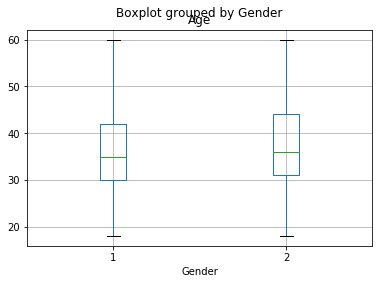

In [35]:
A.boxplot(column='Age', by= 'Gender')

In [38]:
age1.describe()

count    882.000000
mean      36.653061
std        9.042329
min       18.000000
25%       30.000000
50%       35.000000
75%       42.000000
max       60.000000
Name: Age, dtype: float64

In [39]:
age2.describe()

count    588.000000
mean      37.329932
std        9.266083
min       18.000000
25%       31.000000
50%       36.000000
75%       44.000000
max       60.000000
Name: Age, dtype: float64

In [31]:
delta1=(np.mean(age1) - np.mean(age2)) / np.sqrt(((n2-1)*np.var(age1)+(n1-1)*np.var(age2)) / n1+n2-2)
delta1

-0.025121516844196237

In [32]:
pot1=ttest_power(delta1, nobs=n1+n2, alpha=0.05, alternative='two-sided')

In [33]:
pot1

0.16101645157248767